In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("solarpowergeneration (1).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [4]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [5]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [6]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [7]:
df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)

In [8]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
num_col = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_col])
scaled_df = pd.DataFrame(scaled, columns=num_col)

In [11]:
scaled_df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,1.196765,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.098597,-0.293310,-1.392859,-0.676960
1,0.420310,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.231271,-0.706587,-1.181564,-0.676960
2,-0.356146,1.539688,0.440639,-0.536861,-1.407962,0.319659,-0.233088,-1.395381,-0.899837,-0.151480
3,-1.132602,1.539688,0.440639,-0.536861,-1.407962,0.319659,-2.687555,-1.395381,-0.758974,1.793999
4,-1.469066,1.539688,0.440639,-0.536861,-1.407962,0.319659,-3.483598,-0.982104,-0.899837,2.239367


In [12]:
df.corr(numeric_only=True)['power-generated'].sort_values(ascending=False)

power-generated                1.000000
average-wind-speed-(period)    0.278154
wind-direction                 0.146788
wind-speed                     0.142641
temperature                    0.132193
visibility                     0.076536
average-pressure-(period)     -0.036771
sky-cover                     -0.187236
humidity                      -0.522545
distance-to-solar-noon        -0.746681
Name: power-generated, dtype: float64

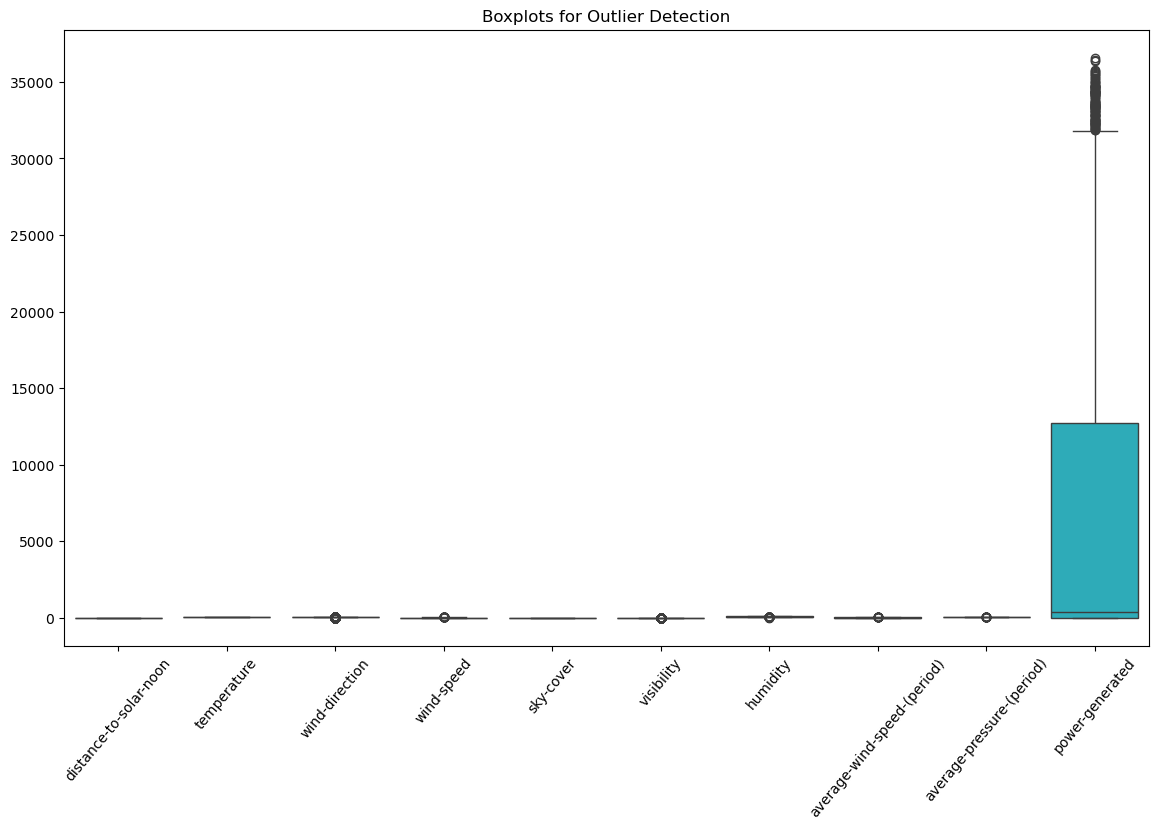

In [13]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=50)
plt.show()

In [14]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

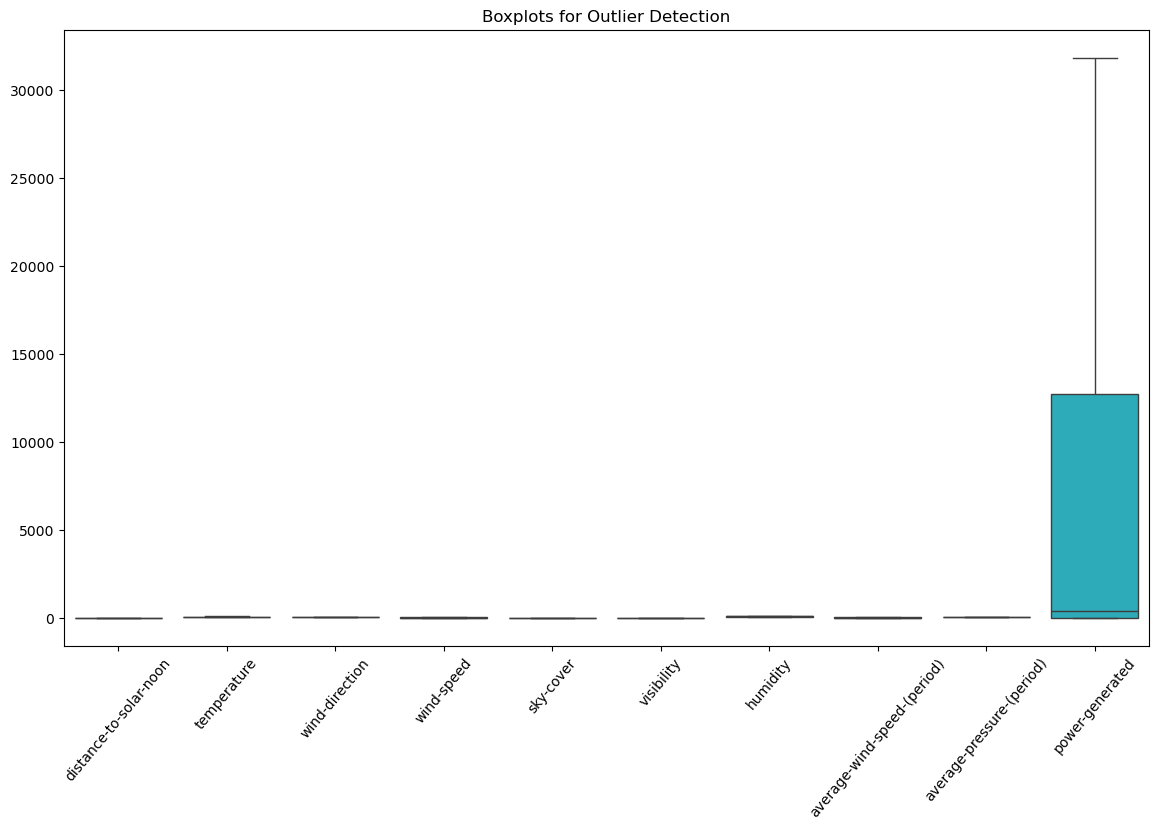

In [15]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=50)
plt.show()

In [16]:
corr = df.drop(columns=['visibility']).corr()

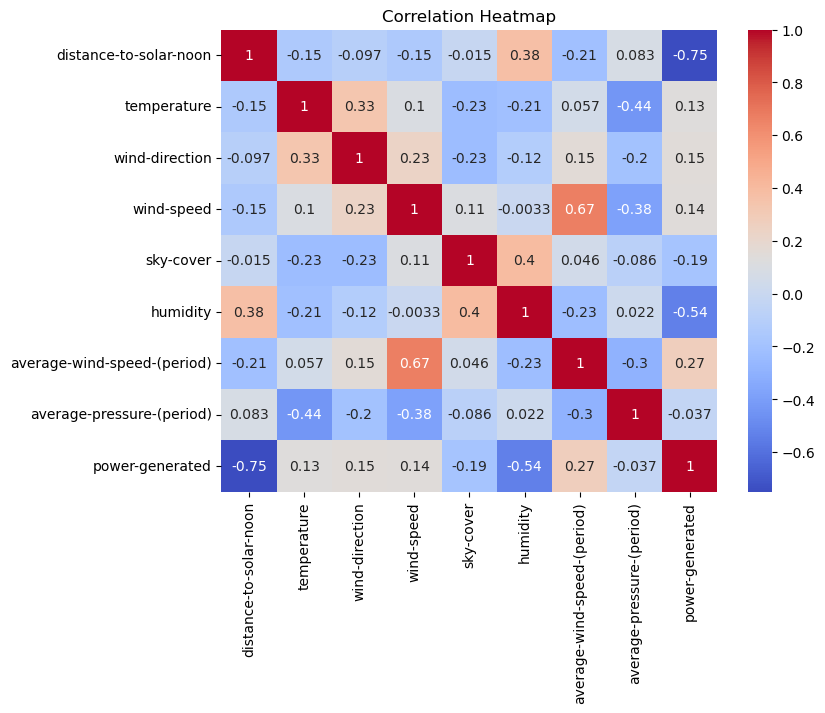

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

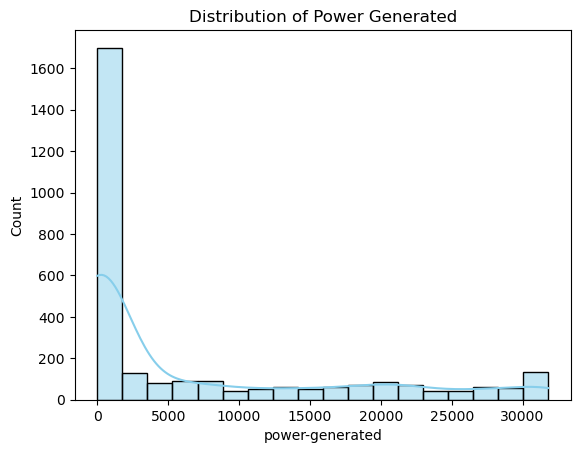

In [18]:
sns.histplot(df['power-generated'], kde=True, color='skyblue')
plt.title("Distribution of Power Generated")
plt.show()

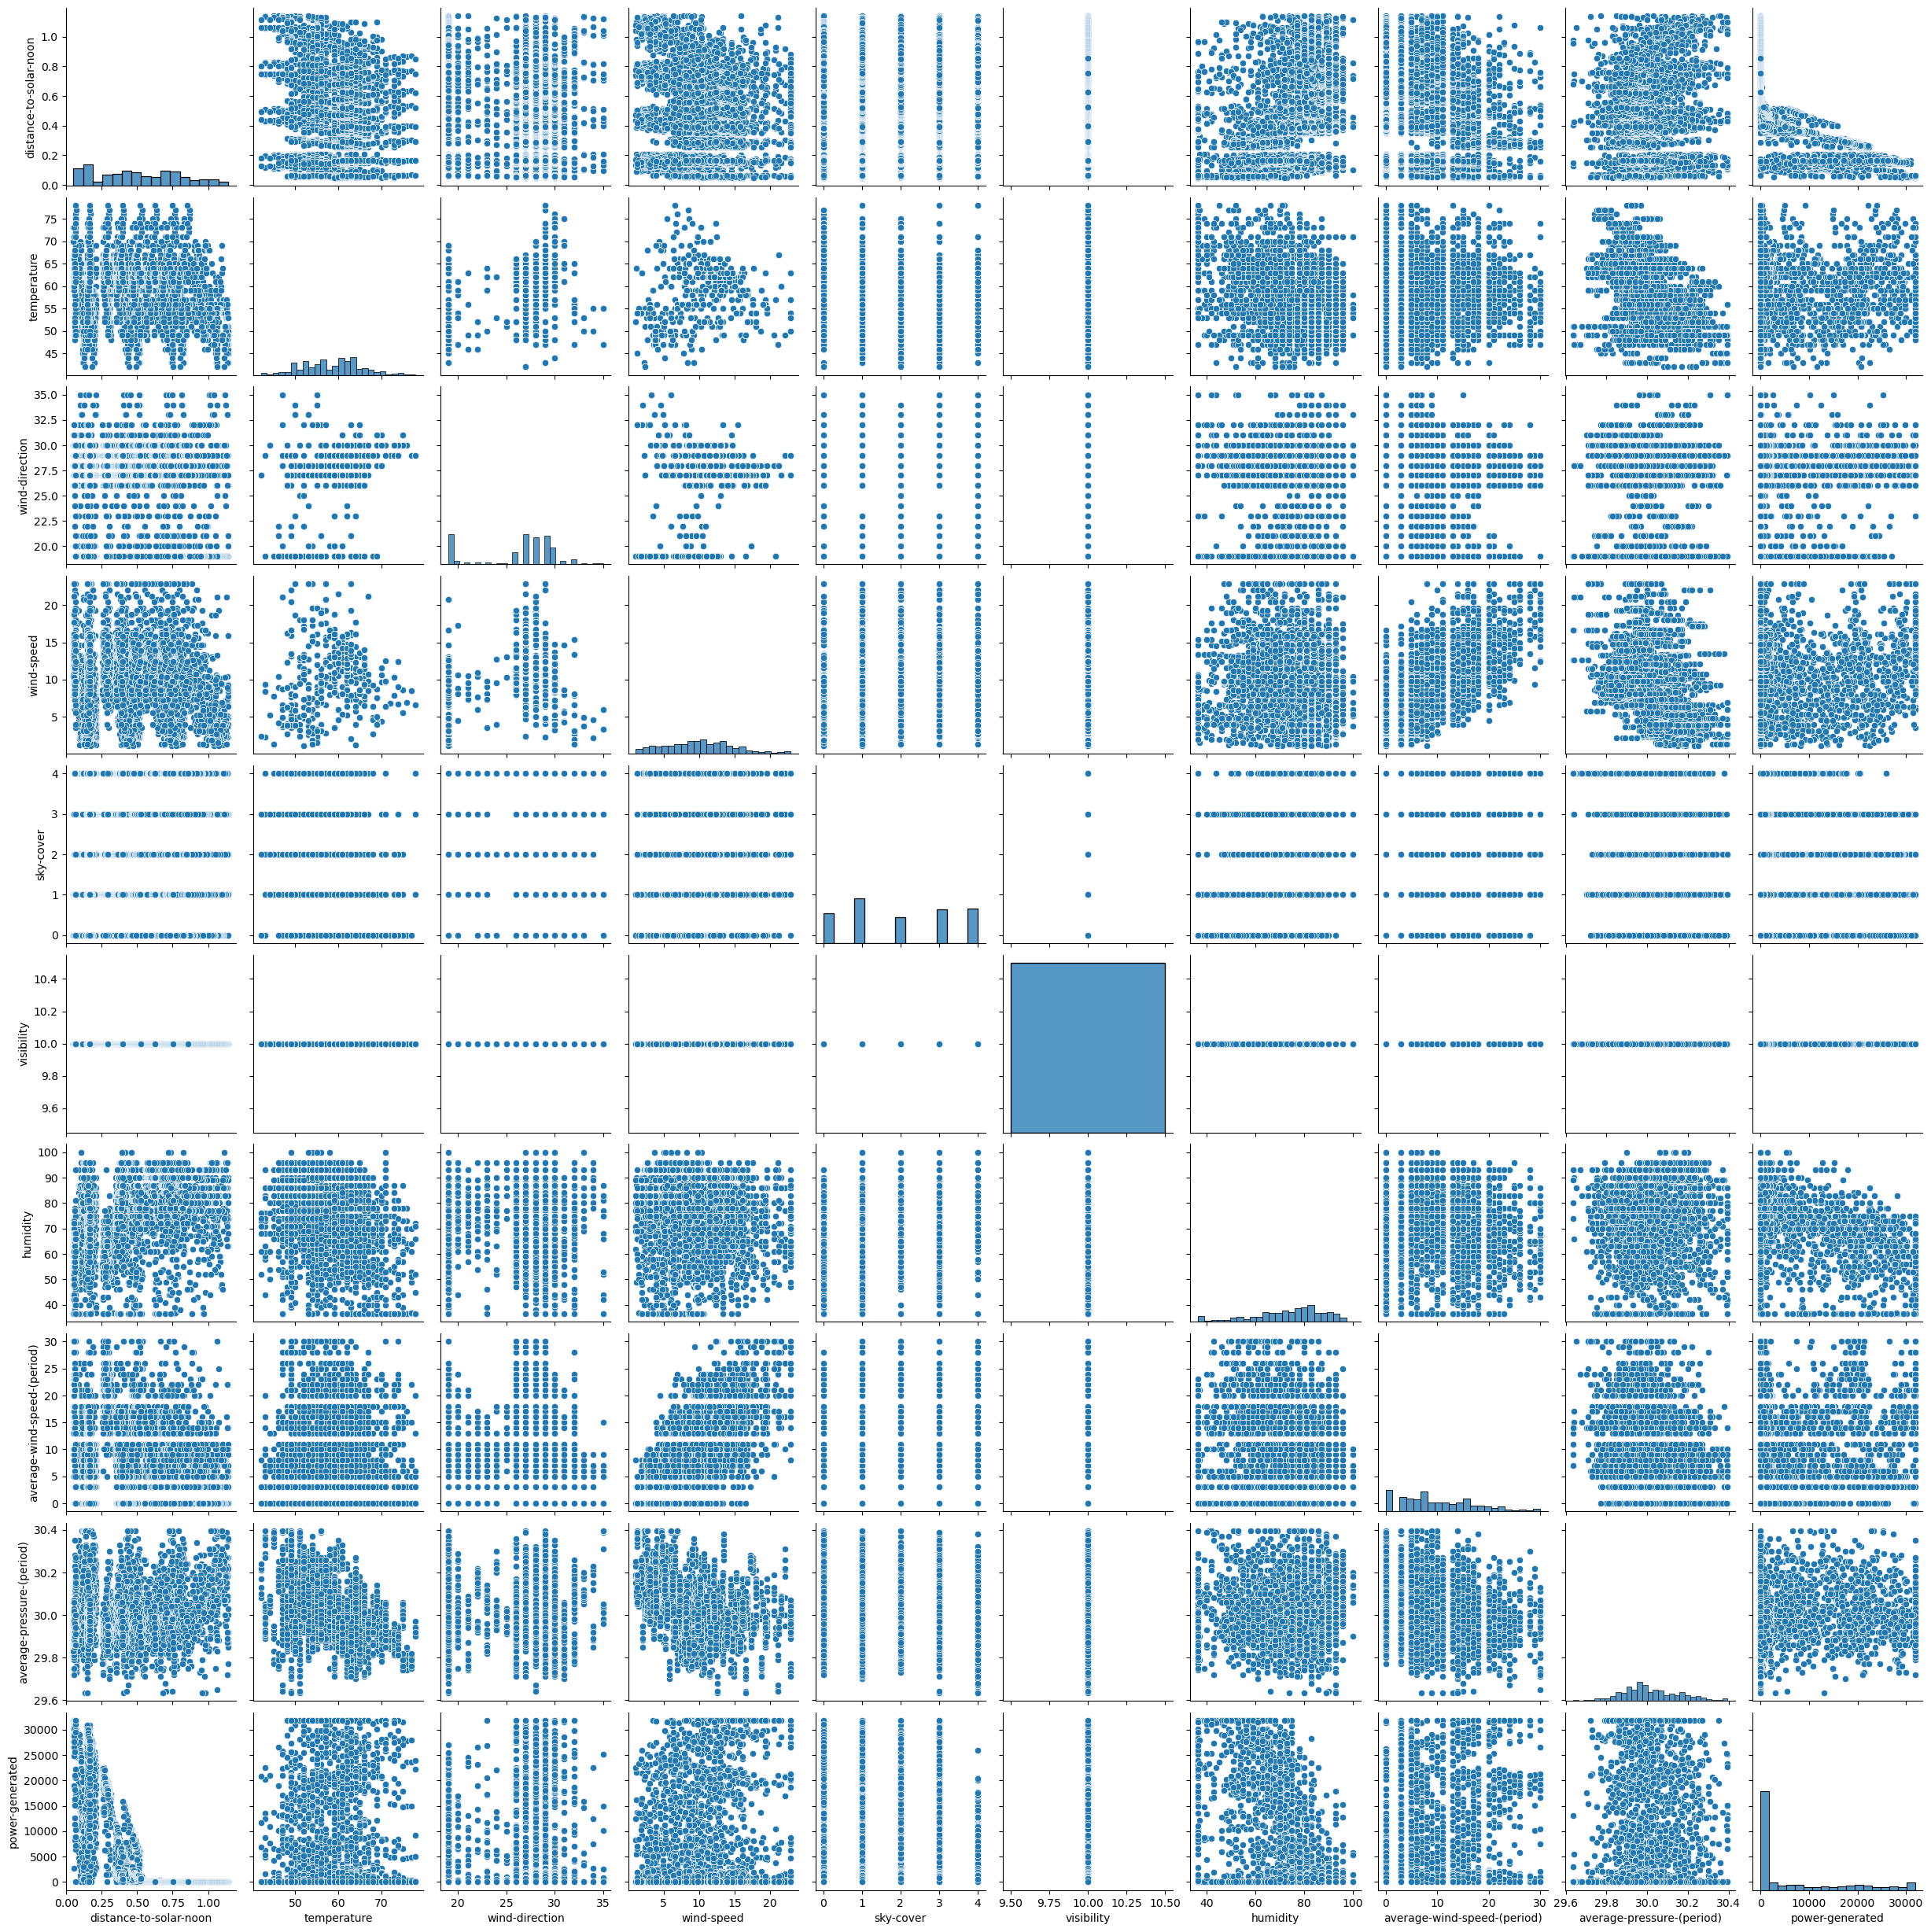

In [19]:
sns.pairplot(df)

## Decision Tree

In [20]:
X = df.drop(columns=["power-generated"])
y = df["power-generated"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

In [24]:
vif_df

,Feature,VIF
0,distance-to-solar-noon,1.256403
1,temperature,1.517759
2,wind-direction,1.232677
3,wind-speed,2.135817
4,sky-cover,1.391141
5,visibility,NaN
6,humidity,1.570189
7,average-wind-speed-(period),2.073615
8,average-pressure-(period),1.511933


In [25]:
high_vif_features = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()
print("\nRemoving high VIF columns:", high_vif_features)
X = X.drop(columns=high_vif_features)


Removing high VIF columns: []


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Decision Tree

In [28]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [29]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [30]:
print("MAE  :", mae_dt)
print("MSE  :", mse_dt)
print("RMSE :", rmse_dt)
print("R2   :", r2_dt)

MAE  : 1907.4717465753424
MSE  : 18864194.518193495
RMSE : 4343.293050001749
R2   : 0.814527507407708


In [31]:
params = {
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}

In [32]:
dt = DecisionTreeRegressor(random_state=42)

In [33]:
grid = GridSearchCV(
    dt,
    param_grid=params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
best_dt = grid.best_estimator_
dt_pred = best_dt.predict(X_test)

In [36]:
mse_dt_tuned = mean_squared_error(y_test, dt_pred)
rmse_dt_tuned = np.sqrt(mse_dt_tuned)
mae_dt_tuned = mean_absolute_error(y_test, dt_pred)
r2_dt_tuned = r2_score(y_test, dt_pred)

In [37]:
print("Best Parameters:", grid.best_params_)
print("MAE  :", mae_dt_tuned)
print("MSE  :", mse_dt_tuned)
print("RMSE :", rmse_dt_tuned)
print("R2   :", r2_dt_tuned)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 20}
MAE  : 1786.0919462176616
MSE  : 14674151.345677761
RMSE : 3830.6854929213077
R2   : 0.8557239523726017


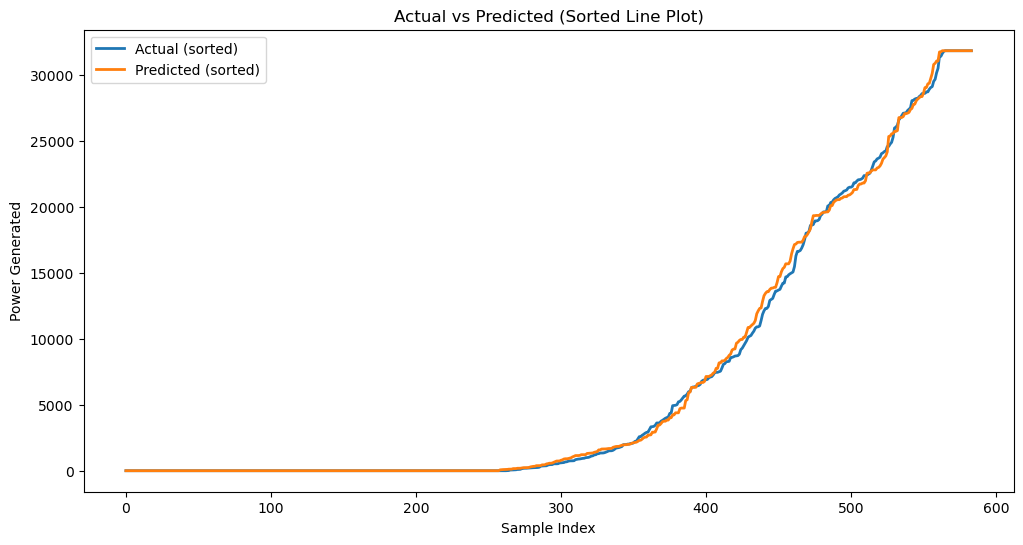

In [38]:
plt.figure(figsize=(12,6))

plt.plot(sorted(y_test.values), label="Actual (sorted)", linewidth=2)
plt.plot(sorted(y_pred_dt), label="Predicted (sorted)", linewidth=2)

plt.title("Actual vs Predicted (Sorted Line Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Power Generated")
plt.legend()
plt.show()

## Multiple Linear Regression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
y_pred_lr = lr.predict(X_test_scaled)

In [42]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [43]:
print("\n--- MODEL PERFORMANCE ---")
print("MAE  :", mae_lr)
print("MSE  :", mse_lr)
print("RMSE :", rmse_lr)
print("R2   :", r2_lr)


--- MODEL PERFORMANCE ---
MAE  : 4872.978791795667
MSE  : 37383483.71933507
RMSE : 6114.203441114392
R2   : 0.6324461189943014


In [44]:
ridge_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 50, 100]
}

In [45]:
ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

In [46]:
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [47]:
best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(X_test_scaled)

In [48]:
print("Best Params:", ridge_grid.best_params_)
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("R2:", r2_score(y_test, ridge_pred))

Best Params: {'alpha': 10}
MAE: 4871.425811308445
RMSE: 6114.485457291694
R2: 0.6324122115419146


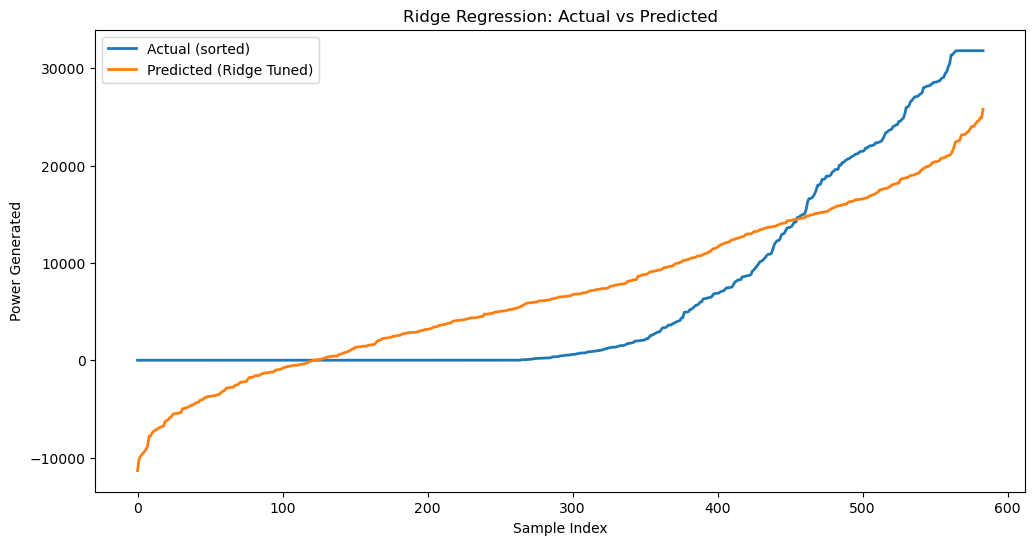

In [49]:
plt.figure(figsize=(12,6))

plt.plot(sorted(y_test.values), label="Actual (sorted)", linewidth=2)
plt.plot(sorted(ridge_pred), label="Predicted (Ridge Tuned)", linewidth=2)

plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Power Generated")
plt.legend()
plt.show()


### Random Forest

In [50]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [51]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_pred_rf = rf.predict(X_test)

In [53]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [54]:
print("\n--- MODEL PERFORMANCE ---")
print("MAE  :", mae_rf)
print("MSE  :", mse_rf)
print("RMSE :", rmse_rf)
print("R2   :", r2_rf)


--- MODEL PERFORMANCE ---
MAE  : 1530.1836686643835
MSE  : 11493922.608411077
RMSE : 3390.2688106418755
R2   : 0.8869919161515807


In [55]:
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [56]:
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [57]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [58]:
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

In [59]:
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

In [60]:
print("Best Params:", rf_grid.best_params_)
print("MAE  :", mae_rf_tuned)
print("MSE  :", mse_rf_tuned)
print("RMSE :", rmse_rf_tuned)
print("R2   :", r2_rf_tuned)

Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
MAE  : 1523.122165788585
MSE  : 11680844.2334868
RMSE : 3417.725008464958
R2   : 0.88515410538851


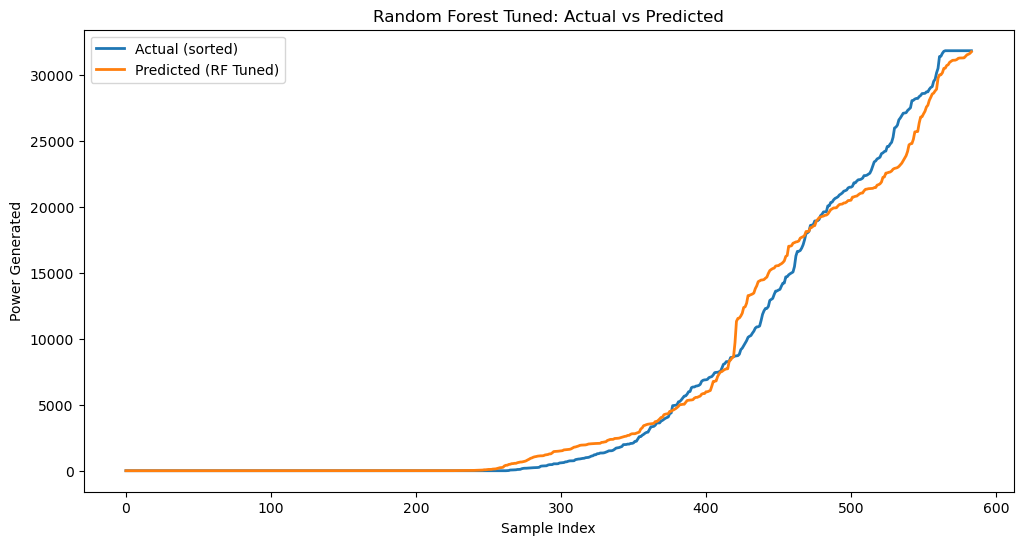

In [61]:
plt.figure(figsize=(12,6))

plt.plot(sorted(y_test.values), label="Actual (sorted)", linewidth=2)
plt.plot(sorted(y_pred_rf_tuned), label="Predicted (RF Tuned)", linewidth=2)

plt.title("Random Forest Tuned: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Power Generated")
plt.legend()
plt.show()


## XGBoost

In [62]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42)

In [63]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [64]:
xgb_mse  = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae  = mean_absolute_error(y_test, xgb_pred)
xgb_r2   = r2_score(y_test, xgb_pred)

In [65]:
print("\n--- MODEL PERFORMANCE ---")
print("MAE  :", xgb_mae)
print("MSE  :", xgb_mse)
print("RMSE :", xgb_rmse)
print("R2   :", xgb_r2)


--- MODEL PERFORMANCE ---
MAE  : 1548.9600119613212
MSE  : 10526427.338112585
RMSE : 3244.445613369499
R2   : 0.8965043159087213


In [66]:
xgb_params = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 6, 8],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

In [67]:
xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid=xgb_params,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

In [68]:
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 6, 8],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [69]:
best_xgb = xgb_grid.best_estimator_
xgb_pred_tuned = best_xgb.predict(X_test)

In [70]:
xgb_mae_tuned  = mean_absolute_error(y_test, xgb_pred_tuned)
xgb_mse_tuned  = mean_squared_error(y_test, xgb_pred_tuned)
xgb_rmse_tuned = np.sqrt(xgb_mse_tuned)
xgb_r2_tuned   = r2_score(y_test, xgb_pred_tuned)

In [71]:
print("Best Params:", xgb_grid.best_params_)
print("MAE:", xgb_mae_tuned)
print("RMSE:", xgb_rmse_tuned)
print("R2:", xgb_r2_tuned)

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
MAE: 1592.529056724416
RMSE: 3146.670840837384
R2: 0.9026482250964883


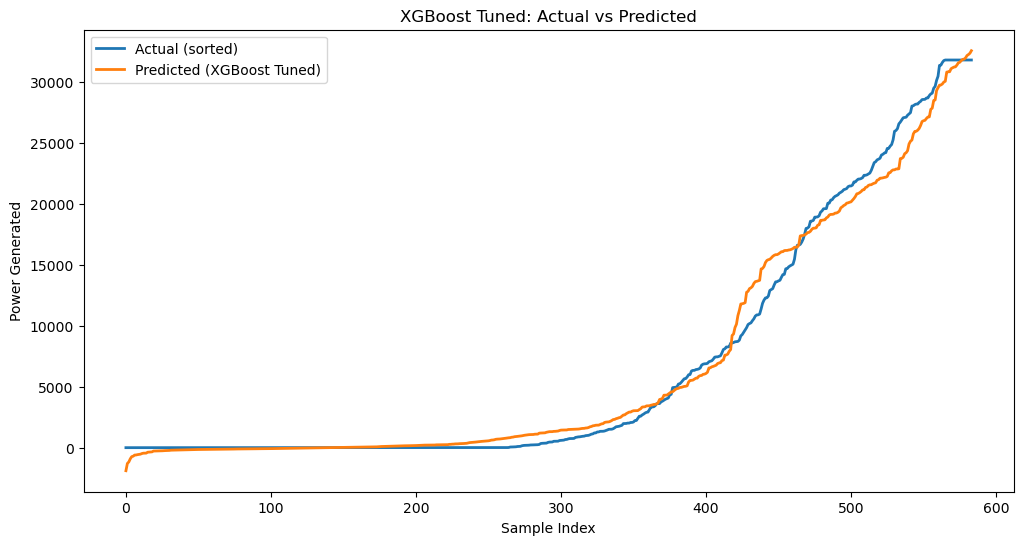

In [72]:
plt.figure(figsize=(12,6))

plt.plot(sorted(y_test.values), label="Actual (sorted)", linewidth=2)
plt.plot(sorted(xgb_pred_tuned), label="Predicted (XGBoost Tuned)", linewidth=2)

plt.title("XGBoost Tuned: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Power Generated")
plt.legend()
plt.show()


## Gradient Boosting

In [73]:
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

In [74]:
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [75]:
gbr_mse  = mean_squared_error(y_test, gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_mae  = mean_absolute_error(y_test, gbr_pred)
gbr_r2   = r2_score(y_test, gbr_pred)

In [76]:
print("\n--- MODEL PERFORMANCE ---")
print("MAE  :", gbr_mae)
print("MSE  :", gbr_mse)
print("RMSE :", gbr_rmse)
print("R2   :", gbr_r2)


--- MODEL PERFORMANCE ---
MAE  : 1557.9281685343683
MSE  : 9276717.023600446
RMSE : 3045.77034978024
R2   : 0.9087914499725328


In [77]:
gbr_params = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.7, 0.8, 1.0]
}

In [78]:
gbr_grid = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gbr_params,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

In [ ]:
gbr_grid.fit(X_train, y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


In [ ]:
best_gbr = gbr_grid.best_estimator_
gbr_pred_tuned = best_gbr.predict(X_test)

In [ ]:
gbr_mse_tuned = mean_squared_error(y_test, gbr_pred_tuned)
gbr_rmse_tuned = np.sqrt(gbr_mse_tuned)
gbr_mae_tuned = mean_absolute_error(y_test, gbr_pred_tuned)
gbr_r2_tuned = r2_score(y_test, gbr_pred_tuned)

In [ ]:
print("Best Params:", gbr_grid.best_params_)
print("MAE  :", gbr_mae_tuned)
print("MSE  :", gbr_mse_tuned)
print("RMSE :", gbr_rmse_tuned)
print("R2   :", gbr_r2_tuned)

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(sorted(y_test.values), label="Actual (sorted)", linewidth=2)
plt.plot(sorted(gbr_pred_tuned), label="Predicted (GBR Tuned)", linewidth=2)

plt.title("Gradient Boosting Tuned: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Power Generated")
plt.legend()
plt.show()


In [ ]:
comparison = {
    "Decision Tree (Tuned)": [
        mae_dt_tuned,
        mse_dt_tuned,
        rmse_dt_tuned,
        r2_dt_tuned
    ],

    "Ridge (Tuned)": [
        mean_absolute_error(y_test, ridge_pred),
        mean_squared_error(y_test, ridge_pred),
        np.sqrt(mean_squared_error(y_test, ridge_pred)),
        r2_score(y_test, ridge_pred)
    ],

    "Random Forest (Tuned)": [
        mae_rf_tuned,
        mse_rf_tuned,
        rmse_rf_tuned,
        r2_rf_tuned
    ],

    "Gradient Boosting (Tuned)": [
        gbr_mae_tuned,
        gbr_mse_tuned,
        gbr_rmse_tuned,
        gbr_r2_tuned
    ],

    "XGBoost (Tuned)": [
        xgb_mae_tuned,
        xgb_mse_tuned,
        xgb_rmse_tuned,
        xgb_r2_tuned
    ]
}

results_df = pd.DataFrame(
    comparison,
    index=["MAE", "MSE", "RMSE", "R2"]
).T

display(results_df.sort_values("RMSE"))
